In [106]:
import pandas as pd, numpy as np
import scipy.optimize as sco
from tqdm import tqdm
import plotly.express as px

In [107]:
covmatrix = np.array(([0.0234,0.0001,0.0089,0.0173],
[0.0001,0.0021,0.0005,0.0018],
[0.0089,0.0005,0.0171,0.0086],
[0.0173,0.0018,0.0086,0.5990]))

init_weights = np.array(([.4,.5,.1,.0]))
expected_returns = np.array(([.13,.04,.04,.25]))

In [108]:
def calc_stats(wts, covmat,exp_ret):
    port_variance = wts @ (covmat @ wts.T)
    risk = np.sqrt(port_variance)
    returns = wts.T @ exp_ret
    sharpe = returns/risk
    return (sharpe,returns,risk)

In [109]:
sharpe_orig,returns,risk = calc_stats(init_weights, covmatrix, expected_returns)
print(f'Risk adjusted Return for Original Portfolio is {np.round(sharpe_orig,4)}')

Risk adjusted Return for Original Portfolio is 1.0497


1. Would you recommend the client to add crypto to the portfolio based on portfolio risk adjusted performance? i.e by allocating  5% to Crypto

In [110]:
cryptowt = 0.05
new_weights = np.array(([.4,.5,.1,.0]))*(1-cryptowt)
new_weights[-1] = cryptowt
assert np.sum(new_weights)==1., "Check Wts"

In [111]:
sharpe_crypto,returns_crypto,risk_crypto = calc_stats(new_weights, covmatrix, expected_returns)
print(f'Risk adjusted Return for 5% Allocation to Crypto in the orig Portfolio is {np.round(sharpe_crypto,4)}')

Risk adjusted Return for 5% Allocation to Crypto in the orig Portfolio is 1.0085


<b> A1: risk Adj Ret becomes lower so not would advise "Against"

2. What should be the minimum expected return of crypto such that it improves the risk adjusted perfromance of portfolio?

In [101]:
def optimizer_wrapper(param,expected_returns, new_wts, sharpe_orig,covmatrix):
    expected_returns[-1] = param
    sharpe,_,_ = calc_stats(new_wts, covmatrix, expected_returns)
    return np.abs(sharpe-sharpe_orig)
fun = lambda x: optimizer_wrapper_1(x,expected_returns,new_weights,sharpe_orig,covmatrix)
res = sco.minimize(fun,x0=.07,method="Nelder-Mead")
print(f"The required Crypto Expected Return to match the Orig Portfolio RaR is {np.round(res['x'][0]*100,2)}%")

The required Crypto Expected Return to match the Orig Portfolio RaR is 31.91%


In [113]:
wts_list = np.arange(.0,1.05,.05)
ans = []
for w in tqdm(wts_list):
    new_weights = init_weights*(1-w)
    new_weights[-1] = w
    fun = lambda x: optimizer_wrapper(x,expected_returns,new_weights,sharpe_orig,covmatrix)
    res = sco.minimize(fun,x0=.01,method="Nelder-Mead")
    ans.append(res['x'][0]*100)
ans[0]=0.

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 818.12it/s]


In [114]:
df = pd.DataFrame(zip(np.round(wts_list*100,2),np.round(ans*100,4)),columns=['Crypto Weights','Expected Returns'])

In [115]:
df

,Crypto Weights,Expected Returns
0,0.0,0.0000
1,5.0,31.9125
2,10.0,45.6188
3,15.0,54.6000
4,20.0,60.6438
5,25.0,64.9125
6,30.0,68.0625
7,35.0,70.4688
8,40.0,72.3688
9,45.0,73.9000


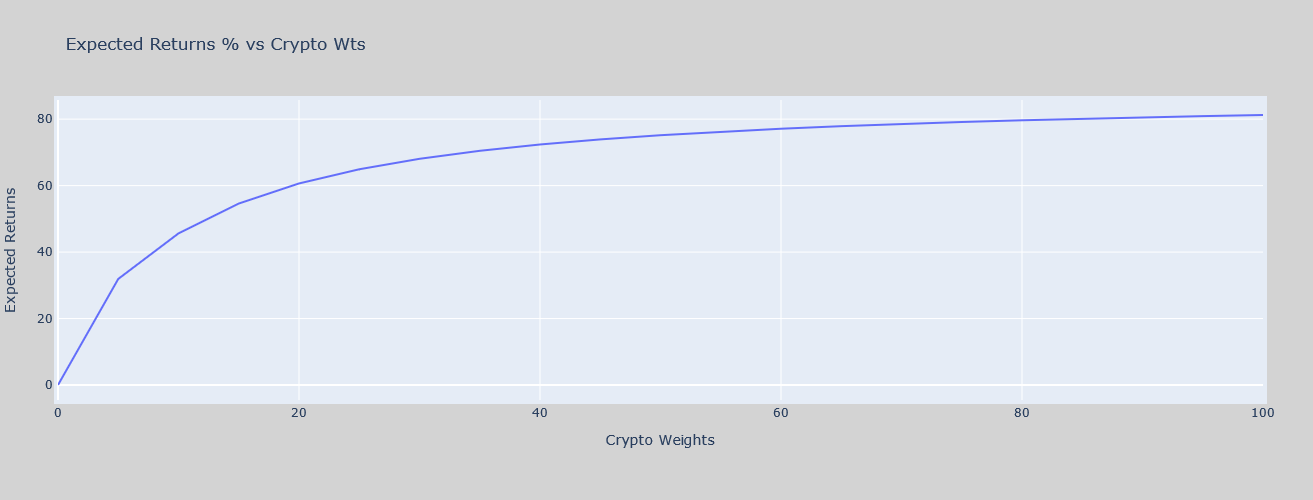

In [116]:
fig = px.line(df, x="Crypto Weights", y="Expected Returns", title='Expected Returns % vs Crypto Wts')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="Lightgrey",
)

fig.show()